<a href="https://colab.research.google.com/github/fhydzaa/Hierarchical-clustering-gempa-bumi/blob/main/BDDM_4274.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Kasus




#2. Version

Python : 3.10.12

#3. Library

#4. Code

##a. Import library







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from itertools import product
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

##b. Pengumpulan data (Load data)

In [ ]:
df_gempa = pd.read_csv('/content/drive/MyDrive/S5/BDDM/FP/katalog_gempa_v2.tsv', sep='\t',index_col="location")

##c. Explorasi data análisis (EDA)

In [ ]:
# Menampilkan 10 data teratas
df_gempa.head(10)

Unnamed: 0      eventID  \
location                                               
Southern Sumatra, Indonesia           0  bmg2008vkye   
Banda Sea                             1  bmg2008vlag   
Seram, Indonesia                      2  bmg2008vlaj   
Banda Sea                             3  bmg2008vlbt   
Banda Sea                             4  bmg2008vlcd   
Seram, Indonesia                      5  bmg2008vldw   
Seram, Indonesia                      6  bmg2008vlef   
Northern Sumatra, Indonesia           7  bmg2008vlfx   
Banda Sea                             8  bmg2008vlja   
Seram, Indonesia                      9  bmg2008vljt   

                                                     datetime  latitude  \
location                                                                  
Southern Sumatra, Indonesia  2008-11-01 00:31:25.143741+00:00 -0.604440   
Banda Sea                    2008-11-01 01:34:29.660856+00:00 -6.611860   
Seram, Indonesia             2008-11-01 01:38:14.802129+00:00 -3.650586   
Banda Sea                    2008-11-01 02:20:05.909515+00:00 -4.198925   
Banda Sea                    2008-11-01 02:32:18.756155+00:00 -4.091891   
Seram, Indonesia             2008-11-01 03:24:09.020131+00:00 -3.755193   
Seram, Indonesia             2008-11-01 03:34:47.510883+00:00 -3.889478   
Northern Sumatra, Indonesia  2008-11-01 04:26:50.151996+00:00  0.486772   
Banda Sea                    2008-11-01 06:01:05.398042+00:00 -4.264244   
Seram, Indonesia             2008-11-01 06:23:00.287751+00:00 -3.432654   

                              longitude  magnitude mag_type  depth  \
location                                                             
Southern Sumatra, Indonesia   98.895531   2.989742      MLv     20   
Banda Sea                    129.387220   5.507549       mb     30   
Seram, Indonesia             127.990680   3.539674      MLv      5   
Banda Sea                    128.097000   2.424314      MLv      5   
Banda Sea                    128.200470   2.410045      MLv     10   
Seram, Indonesia             127.382280   2.938879      MLv     10   
Seram, Indonesia             128.243190   2.218964      MLv     10   
Northern Sumatra, Indonesia   98.328484   3.853423      MLv     16   
Banda Sea                    127.661870   3.243451      MLv     10   
Seram, Indonesia             128.388600   2.317467      MLv     10   

                             phasecount  azimuth_gap  ... doubleCouple clvd  \
location                                              ...                     
Southern Sumatra, Indonesia         6.0    146.70738  ...          NaN  NaN   
Banda Sea                          62.0     45.46764  ...          NaN  NaN   
Seram, Indonesia                    4.0    331.97404  ...          NaN  NaN   
Banda Sea                           5.0    326.37993  ...          NaN  NaN   
Banda Sea                           5.0    314.65474  ...          NaN  NaN   
Seram, Indonesia                    4.0    350.03813  ...          NaN  NaN   
Seram, Indonesia                    4.0    294.60504  ...          NaN  NaN   
Northern Sumatra, Indonesia         7.0    251.06932  ...          NaN  NaN   
Banda Sea                           5.0    348.60759  ...          NaN  NaN   
Seram, Indonesia                    4.0    223.48315  ...          NaN  NaN   

                             strikeNP1  dipNP1  rakeNP1 strikeNP2  dipNP2  \
location                                                                    
Southern Sumatra, Indonesia        NaN     NaN      NaN       NaN     NaN   
Banda Sea                          NaN     NaN      NaN       NaN     NaN   
Seram, Indonesia                   NaN     NaN      NaN       NaN     NaN   
Banda Sea                          NaN     NaN      NaN       NaN     NaN   
Banda Sea                          NaN     NaN      NaN       NaN     NaN   
Seram, Indonesia                   NaN     NaN      NaN       NaN     NaN   
Seram, Indonesia                   NaN     NaN   

In [ ]:
# Menampilkan 10 data terbawah
df_gempa.tail(10)

Unnamed: 0      eventID  \
location                                                
South of Bali, Indonesia          109854  bmg2023ynfl   
Java, Indonesia                   109855  bmg2023yngc   
West Papua Region, Indonesia      109856  bmg2023yngf   
Southern Sumatra, Indonesia       109857  bmg2023ynjd   
Java, Indonesia                   109858  bmg2023ynju   
Southern Sumatra, Indonesia       109859  bmg2023ynla   
Flores Region, Indonesia          109860  bmg2023ynmd   
Southern Molucca Sea              109861  bmg2023ynne   
Sulawesi, Indonesia               109862  bmg2023ynpl   
Java, Indonesia                   109863  bmg2023ynpm   

                                                      datetime  latitude  \
location                                                                   
South of Bali, Indonesia      2023-12-15 18:23:08.919616+00:00 -9.776032   
Java, Indonesia               2023-12-15 18:42:58.189443+00:00 -7.145281   
West Papua Region, Indonesia  2023-12-15 18:45:25.498673+00:00 -0.944820   
Southern Sumatra, Indonesia   2023-12-15 20:14:52.273168+00:00 -0.252520   
Java, Indonesia               2023-12-15 20:33:56.330570+00:00 -7.149442   
Southern Sumatra, Indonesia   2023-12-15 21:11:38.766762+00:00 -4.580551   
Flores Region, Indonesia      2023-12-15 21:45:29.204081+00:00 -8.196700   
Southern Molucca Sea          2023-12-15 22:17:08.076611+00:00 -1.149563   
Sulawesi, Indonesia           2023-12-15 23:25:25.162057+00:00 -1.163247   
Java, Indonesia               2023-12-15 23:26:50.949705+00:00 -7.238420   

                               longitude  magnitude mag_type  depth  \
location                                                              
South of Bali, Indonesia      114.718307   3.499147      MLv     19   
Java, Indonesia               108.879791   3.796993       Mw     10   
West Papua Region, Indonesia  134.325653   3.330164      MLv     11   
Southern Sumatra, Indonesia   100.516113   2.473493      MLv     10   
Java, Indonesia               108.838638   2.837879      MLv     10   
Southern Sumatra, Indonesia   101.874329   3.397536      MLv     10   
Flores Region, Indonesia      119.879776   3.854209      MLv    176   
Southern Molucca Sea          126.833305   4.231206      MLv     10   
Sulawesi, Indonesia           120.603287   2.542247      MLv     10   
Java, Indonesia               109.802452   2.299735      MLv     16   

                              phasecount  azimuth_gap  ... doubleCouple  \
location                                               ...                
South of Bali, Indonesia            54.0   216.740623  ...          NaN   
Java, Indonesia                     26.0   175.882156  ...     0.834108   
West Papua Region, Indonesia        17.0   176.767036  ...          NaN   
Southern Sumatra, Indonesia         14.0   173.722827  ...          NaN   
Java, Indonesia                     52.0    94.435699  ...          NaN   
Southern Sumatra, Indonesia         27.0   195.667015  ...          NaN   
Flores Region, Indonesia            62.0    85.166809  ...          NaN   
Southern Molucca Sea                69.0    35.909698  ...          NaN   
Sulawesi, Indonesia                 15.0    91.615578  ...          NaN   
Java, Indonesia                     17.0   101.806532  ...          NaN   

                                  clvd  strikeNP1    dipNP1    rakeNP1  \
location                                                                 
South of Bali, Indonesia           NaN        NaN       NaN        NaN   
Java, Indonesia               0.165892  82.798776  51.31604  28.541366   
West Papua Region, Indonesia       NaN        NaN       NaN        NaN   
Southern Sumatra, Indonesia        NaN        NaN       NaN        NaN   
Java, Indonesia                    NaN        NaN       NaN        NaN   
Southern Sumatra, Indonesia        NaN        NaN       NaN        NaN   
Flores Region, Indonesia           NaN        NaN       NaN        NaN   
Southern Mol

In [ ]:
_# Menampilkan analisis data yang bersifat numerical
df_gempa.describe()

Unnamed: 0       latitude      longitude      magnitude  \
count  109864.000000  109864.000000  109864.000000  109346.000000   
mean    54931.500000      -3.365925     119.181000       3.594670   
std     31715.149324       4.347793      10.842995       0.815951   
min         0.000000     -10.999324      95.002388       0.638354   
25%     27465.750000      -7.834655     112.929110       3.000942   
50%     54931.500000      -2.879394     121.305476       3.535103   
75%     82397.250000       0.178393     126.905505       4.166125   
max    109863.000000       5.999397     140.998291       7.923472   

               depth     phasecount    azimuth_gap        latFM        lonFM  \
count  109864.000000  109862.000000  109860.000000  3639.000000  3639.000000   
mean       51.407750      21.898500     151.485555    -3.061153   119.571966   
std        82.342517      30.513651      62.449443     4.483975    12.030349   
min         0.000000       1.000000       9.277467   -11.210044    94.798943   
25%        10.000000       9.000000     101.441052    -7.033031   108.598545   
50%        17.000000      14.000000     146.009552    -3.196360   123.488464   
75%        56.000000      24.000000     198.501798     0.585022   128.244675   
max       750.000000    1268.000000     360.000000     6.241225   140.971100   

             magFM  ...  doubleCouple          clvd    strikeNP1       dipNP1  \
count  3121.000000  ...   3495.000000  3.495000e+03  3639.000000  3639.000000   
mean      4.884101  ...      0.752478  2.475217e-01   173.026665    60.540242   
std       0.610318  ...      0.199961  1.999609e-01    89.886192    20.109145   
min       2.223048  ...      0.028806  3.184213e-16     0.000000     1.289494   
25%       4.543175  ...      0.646603  9.061327e-02   108.139426    47.103416   
50%       4.871941  ...      0.798685  2.013146e-01   147.260426    63.557699   
75%       5.201807  ...      0.909387  3.533974e-01   228.037410    77.118563   
max       7.580354  ...      1.000000  9.711943e-01   359.984315    90.000000   

           rakeNP1    strikeNP2       dipNP2      rakeNP2      azgapFM  \
count  3639.000000  3639.000000  3639.000000  3639.000000  3495.000000   
mean     25.477534   194.021632    57.080737    28.814771   150.238991   
std     103.342450   118.843539    21.634358    99.505379    76.342690   
min    -179.990969     0.000000     0.522594  -179.993131     0.000000   
25%     -50.527417    60.062594    40.524835   -31.356072    87.414872   
50%      51.286099   234.347971    59.660862    42.687697   142.153598   
75%     100.946586   293.977535    75.402096   108.336702   204.445676   
max     180.000000   359.983704    90.000000   180.000000   360.000000   

            misfit  
count  3492.000000  
mean      0.227587  
std       0.101955  
min       0.027210  
25%       0.160350  
50%       0.218007  
75%       0.278728  
max       1.039897  

[8 rows x 31 columns]

In [ ]:
df_gempa.isnull().sum()

Unnamed: 0                0
eventID                   0
datetime                  0
latitude                  0
longitude                 0
magnitude               518
mag_type                518
depth                     0
phasecount                2
azimuth_gap               4
agency                 3446
datetimeFM           106225
latFM                106225
lonFM                106225
magFM                106743
magTypeFM            106743
depthFM              106225
phasecountFM         106225
AzGapFM              106369
scalarMoment         106369
Mrr                  106369
Mtt                  106369
Mpp                  106369
Mrt                  106369
Mrp                  106369
Mtp                  106369
varianceReduction    106370
doubleCouple         106369
clvd                 106369
strikeNP1            106225
dipNP1               106225
rakeNP1              106225
strikeNP2            106225
dipNP2               106225
rakeNP2              106225
azgapFM             

In [ ]:
# Menampilkan informasi dari setiap kolom pada datasets
df_gempa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109864 entries, Southern Sumatra, Indonesia to Java, Indonesia
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         109864 non-null  int64  
 1   eventID            109864 non-null  object 
 2   datetime           109864 non-null  object 
 3   latitude           109864 non-null  float64
 4   longitude          109864 non-null  float64
 5   magnitude          109346 non-null  float64
 6   mag_type           109346 non-null  object 
 7   depth              109864 non-null  int64  
 8   phasecount         109862 non-null  float64
 9   azimuth_gap        109860 non-null  float64
 10  agency             106418 non-null  object 
 11  datetimeFM         3639 non-null    object 
 12  latFM              3639 non-null    float64
 13  lonFM              3639 non-null    float64
 14  magFM              3121 non-null    float64
 15  magTypeFM          31

In [ ]:
# Menampilkan dulikasi data
df_gempa.duplicated().sum()

0

In [ ]:
# Manampilkan jumlah row
df_gempa.shape[0]

109864

##d. Preprocessing data (Feature selection)

In [ ]:
# Ubah kolom datetime menjadi tipe data datetime jika belum
df_gempa['datetime'] = pd.to_datetime(df_gempa['datetime'], utc=True)

condition = df_gempa['datetime'].dt.year > 2020

# Menghapus baris yang memenuhi kondisi
df_gempa = df_gempa[condition]

df_gempa.tail()

Unnamed: 0      eventID  \
location                                               
Southern Sumatra, Indonesia      109859  bmg2023ynla   
Flores Region, Indonesia         109860  bmg2023ynmd   
Southern Molucca Sea             109861  bmg2023ynne   
Sulawesi, Indonesia              109862  bmg2023ynpl   
Java, Indonesia                  109863  bmg2023ynpm   

                                                    datetime  latitude  \
location                                                                 
Southern Sumatra, Indonesia 2023-12-15 21:11:38.766762+00:00 -4.580551   
Flores Region, Indonesia    2023-12-15 21:45:29.204081+00:00 -8.196700   
Southern Molucca Sea        2023-12-15 22:17:08.076611+00:00 -1.149563   
Sulawesi, Indonesia         2023-12-15 23:25:25.162057+00:00 -1.163247   
Java, Indonesia             2023-12-15 23:26:50.949705+00:00 -7.238420   

                              longitude  magnitude mag_type  depth  \
location                                                             
Southern Sumatra, Indonesia  101.874329   3.397536      MLv     10   
Flores Region, Indonesia     119.879776   3.854209      MLv    176   
Southern Molucca Sea         126.833305   4.231206      MLv     10   
Sulawesi, Indonesia          120.603287   2.542247      MLv     10   
Java, Indonesia              109.802452   2.299735      MLv     16   

                             phasecount  azimuth_gap  ... doubleCouple clvd  \
location                                              ...                     
Southern Sumatra, Indonesia        27.0   195.667015  ...          NaN  NaN   
Flores Region, Indonesia           62.0    85.166809  ...          NaN  NaN   
Southern Molucca Sea               69.0    35.909698  ...          NaN  NaN   
Sulawesi, Indonesia                15.0    91.615578  ...          NaN  NaN   
Java, Indonesia                    17.0   101.806532  ...          NaN  NaN   

                             strikeNP1  dipNP1  rakeNP1 strikeNP2  dipNP2  \
location                                                                    
Southern Sumatra, Indonesia        NaN     NaN      NaN       NaN     NaN   
Flores Region, Indonesia           NaN     NaN      NaN       NaN     NaN   
Southern Molucca Sea               NaN     NaN      NaN       NaN     NaN   
Sulawesi, Indonesia                NaN     NaN      NaN       NaN     NaN   
Java, Indonesia                    NaN     NaN      NaN       NaN     NaN   

                             rakeNP2  azgapFM  misfit  
location                                               
Southern Sumatra, Indonesia      NaN      NaN     NaN  
Flores Region, Indonesia         NaN      NaN     NaN  
Southern Molucca Sea             NaN      NaN     NaN  
Sulawesi, Indonesia              NaN      NaN     NaN  
Java, Indonesia                  NaN      NaN     NaN  

[5 rows x 37 columns]

In [ ]:
# Memilih kolom yang akan digunakan
df_use = df_gempa[['latitude'	,'longitude',	'magnitude',	'depth',	'phasecount',	'azimuth_gap']]

In [ ]:
# Hapus data main_category yang  bernilai null/NaN
df_use.dropna(subset=['magnitude','phasecount','azimuth_gap'], inplace=True)
df_use.isnull().sum()

latitude       0
longitude      0
magnitude      0
depth          0
phasecount     0
azimuth_gap    0
dtype: int64

In [ ]:
# Menampilkan 10 data teeratas setelah EDA
df_use.head(10)

latitude   longitude  magnitude  depth  \
location                                                                  
Sumbawa Region, Indonesia       -8.214952  117.809219   3.483098     19   
Sumbawa Region, Indonesia       -9.013550  118.489365   4.275109     67   
Sulawesi, Indonesia             -1.848494  120.531387   3.920442     10   
Bali Sea                        -6.043216  114.037796   5.577193     10   
Sumba Region, Indonesia         -9.901868  120.742447   3.047903     41   
Sumba Region, Indonesia         -9.720883  120.606300   2.492208     31   
Northern Sumatra, Indonesia      4.320011   96.516106   2.754105     10   
Southwest of Sumatra, Indonesia -5.390473  101.022690   4.829008    569   
Irian Jaya Region, Indonesia    -3.096825  131.809845   3.593468     30   
Southern Molucca Sea            -0.215365  124.453438   4.642399     10   

                                 phasecount  azimuth_gap  
location                                                  
Sumbawa Region, Indonesia              23.0   112.881405  
Sumbawa Region, Indonesia              51.0   152.755386  
Sulawesi, Indonesia                    31.0    51.862602  
Bali Sea                               11.0   135.619244  
Sumba Region, Indonesia                16.0   152.238293  
Sumba Region, Indonesia                10.0   135.211803  
Northern Sumatra, Indonesia            11.0   140.309876  
Southwest of Sumatra, Indonesia        14.0   235.463234  
Irian Jaya Region, Indonesia           18.0    98.220810  
Southern Molucca Sea                   61.0    51.544220

In [ ]:
print((df_use['depth'] < 0).sum())

0


In [ ]:
# Manampilkan jumlah row setelah EDA
df_use.shape[0]

32228

<Axes: >

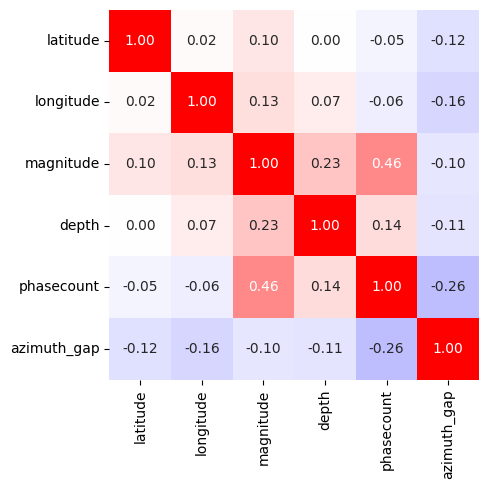

In [ ]:
sns.heatmap(df_use.corr(),cmap="bwr",cbar=False,vmin=-1,vmax=1,annot=True,square=True, fmt =".2f")

##e. Spliting data

In [ ]:
df_split = df_use[['magnitude',	'depth','phasecount',	'azimuth_gap']]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_split)
df_split = pd.DataFrame(scaler.transform(df_split),columns= df_split.columns)
df_split

magnitude     depth  phasecount  azimuth_gap
0       0.385617  0.024032    0.017364     0.295401
1       0.500040  0.088117    0.039463     0.409092
2       0.448801  0.012016    0.023678     0.121421
3       0.688154  0.012016    0.007893     0.360233
4       0.322744  0.053405    0.011839     0.407618
...          ...       ...         ...          ...
32223   0.373256  0.012016    0.020521     0.531444
32224   0.439232  0.233645    0.048145     0.216380
32225   0.493697  0.012016    0.053670     0.075935
32226   0.249691  0.012016    0.011050     0.234767
32227   0.214655  0.020027    0.012628     0.263824

[32228 rows x 4 columns]

In [ ]:
pca = PCA(n_components = 3,random_state = 42)
pca_data= pd.DataFrame(pca.fit_transform(df_split), columns=(["PC1","PC2","PC3"]))
pca_data.describe().T

count          mean       std       min       25%       50%       75%  \
PC1  32228.0 -3.703959e-17  0.179502 -0.539185 -0.145751 -0.021110  0.136083   
PC2  32228.0 -5.247275e-17  0.123721 -0.330587 -0.084657 -0.017127  0.065415   
PC3  32228.0  2.844111e-17  0.096485 -0.369296 -0.053266 -0.009017  0.036331   

          max  
PC1  0.617478  
PC2  0.806606  
PC3  0.851085

In [ ]:
x =pca_data["PC1"]
y =pca_data["PC2"]
z =pca_data["PC3"]
fig = px.scatter_3d(pca_data, x, y, z,color=df_split.index)
fig.show()

In [ ]:
X = pca_data

##f. Pembuatan model

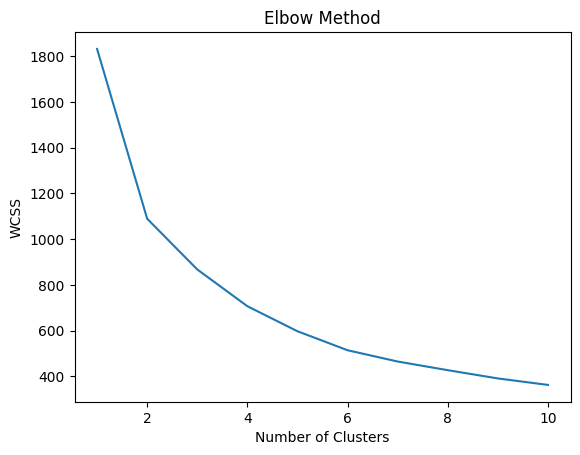

In [ ]:
# Determine Number Clusters
# METHOD 1  Elbow Method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

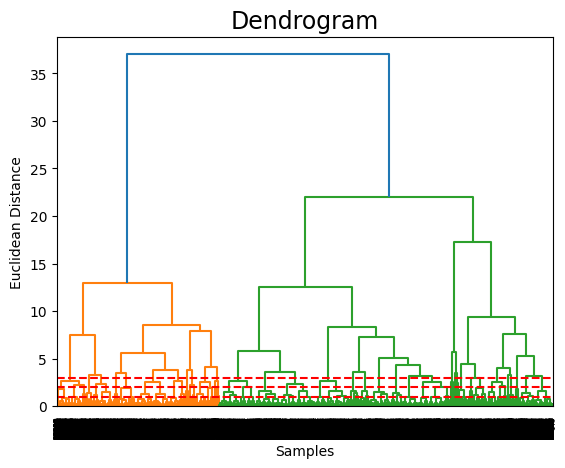

Assigned Clusters: [2 1 3 ... 3 2 2]


In [ ]:
# Perform hierarchical clustering using linkage ward
linkage_matrix = sch.linkage(X, method='ward')

# Determine the number of clusters (e.g., 3 clusters)
num_clusters = 3

# Assign clusters using fcluster
clusters = sch.fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Plot the dendrogram with cluster boundaries
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram', fontsize=17)
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')

# Plot vertical lines to indicate cluster boundaries
for cluster_num in range(1, num_clusters + 1):
    plt.axhline(y=cluster_num, linestyle='--', color='red')

plt.show()

# Print assigned clusters
print('Assigned Clusters:', clusters)

In [ ]:
# Creating Hierarchical clustering scatter plot in 3D
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Y_pred = hc.fit_predict(X)

In [ ]:
df_split['Cluster'] = Y_pred
df_use['Cluster'] = Y_pred

##g. Hasil model

In [ ]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

colors = ['cyan', 'green', 'pink', 'magenta', 'red', 'orange', 'blue', 'violet', 'black']

clustered_data = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Feature3': X[:, 2], 'Cluster': Y_pred})

fig = px.scatter_3d(clustered_data, x='Feature1', y='Feature2', z='Feature3', color='Cluster',
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    title='Hierarchical Clustering in 3D',
                    labels={'Feature1': 'Feature 1', 'Feature2': 'Feature 2', 'Feature3': 'Feature 3'})
fig.show()

In [ ]:
df_split.groupby(['Cluster'])['Cluster'].count()

Cluster
0    21679
1    10549
Name: Cluster, dtype: int64

In [ ]:
df_split

magnitude     depth  phasecount  azimuth_gap  Cluster
0       0.385617  0.024032    0.017364     0.295401        0
1       0.500040  0.088117    0.039463     0.409092        1
2       0.448801  0.012016    0.023678     0.121421        0
3       0.688154  0.012016    0.007893     0.360233        0
4       0.322744  0.053405    0.011839     0.407618        0
...          ...       ...         ...          ...      ...
32223   0.373256  0.012016    0.020521     0.531444        1
32224   0.439232  0.233645    0.048145     0.216380        0
32225   0.493697  0.012016    0.053670     0.075935        0
32226   0.249691  0.012016    0.011050     0.234767        0
32227   0.214655  0.020027    0.012628     0.263824        0

[32228 rows x 5 columns]

##h. Evaluasi model

In [ ]:
# Calculate Davies-Bouldin Index
dbi_score = davies_bouldin_score(X, Y_pred)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, Y_pred)

print(f'Davies-Bouldin Index: {dbi_score}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 1.015140515304508
Silhouette Score: 0.3752121296968526


In [ ]:
df_split.isnull().sum()

magnitude      0
depth          0
phasecount     0
azimuth_gap    0
Cluster        0
dtype: int64

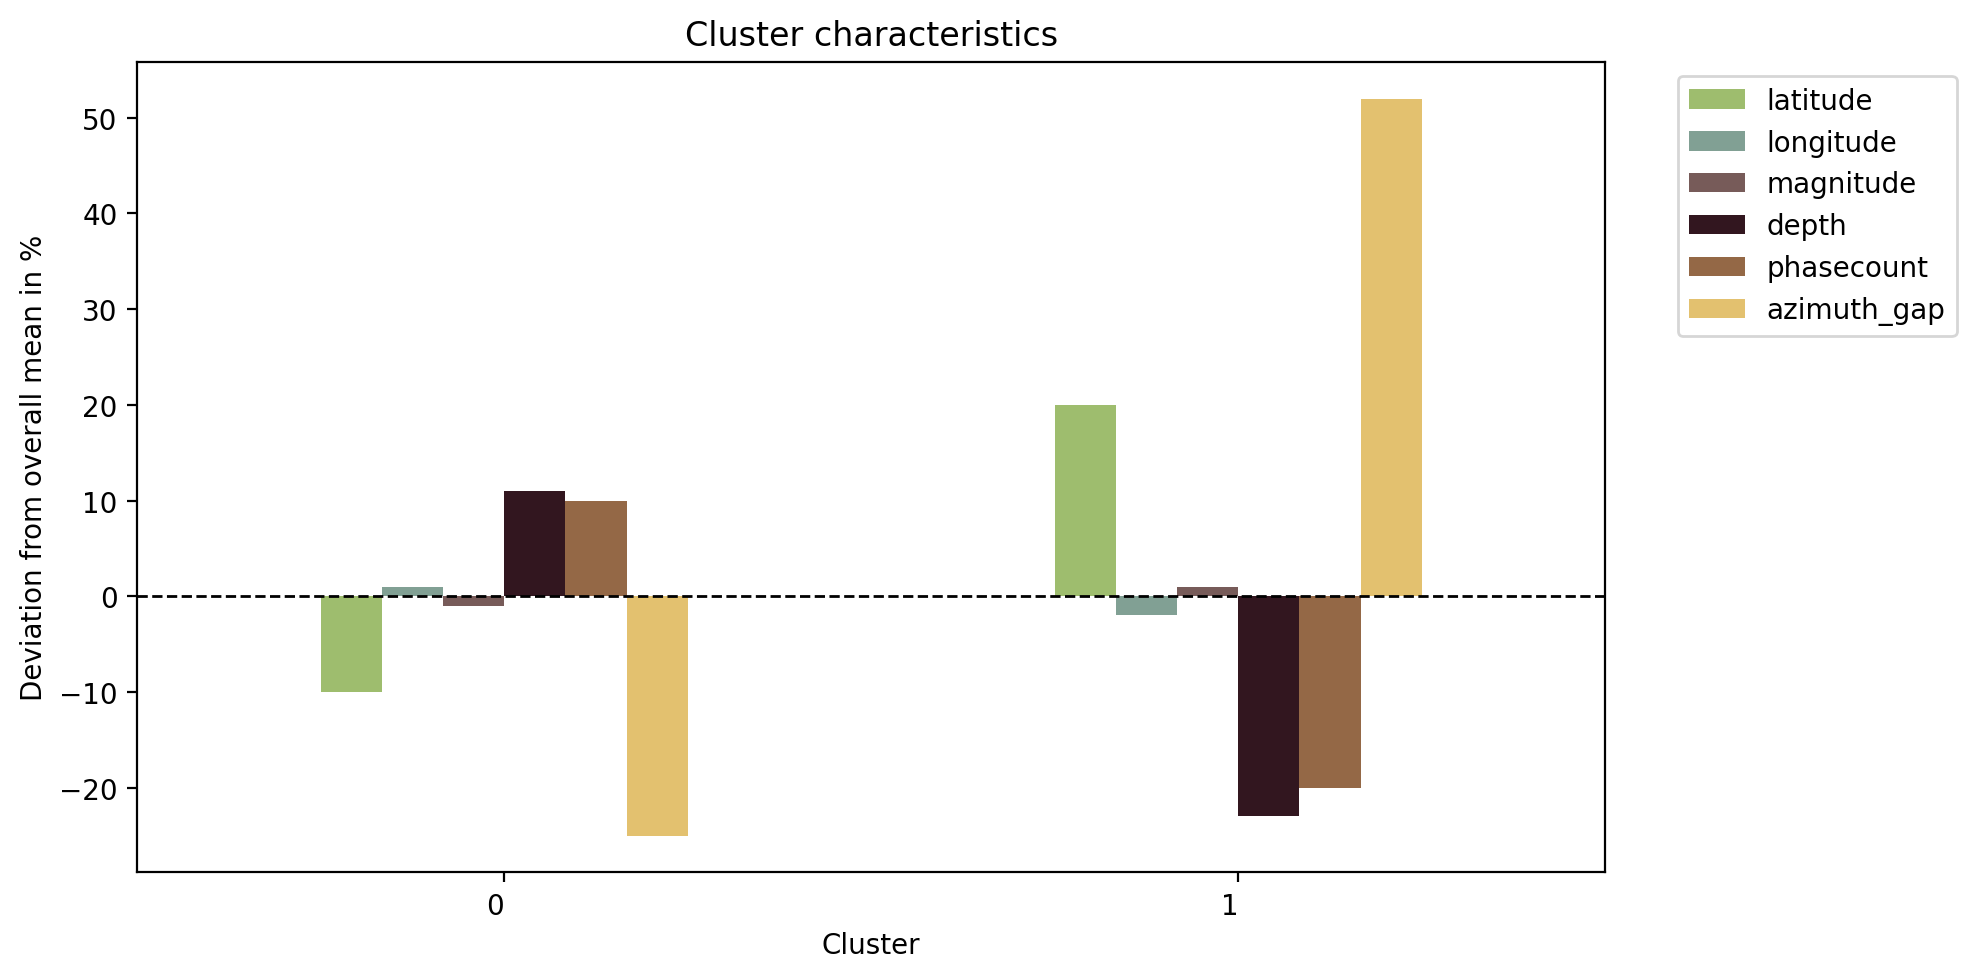

In [ ]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

df_mean = pd.concat([pd.DataFrame(df_use.mean().drop('Cluster'), columns=['mean']),
                   df_use.groupby('Cluster').mean().T], axis=1)
df_dev_rel = df_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
df_dev_rel.drop(columns=['mean'], inplace=True)
df_mean.drop(columns=['mean'], inplace=True)

fig = plt.figure(figsize=(10,5), dpi=200)
df_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df_mean

0           1
latitude      -3.087892   -4.101413
longitude    120.114771  116.972026
magnitude      3.423271    3.485665
depth         53.884866   37.421936
phasecount    34.109092   24.959996
azimuth_gap  104.698817  213.327784

In [ ]:
df_dev_rel

0     1
latitude    -10.0  20.0
longitude     1.0  -2.0
magnitude    -1.0   1.0
depth        11.0 -23.0
phasecount   10.0 -20.0
azimuth_gap -25.0  52.0

In [ ]:
Cluster1 = df_use[df_use['Cluster']==0]
Cluster2 = df_use[df_use['Cluster']==1]

In [ ]:
list(Cluster1.index.drop_duplicates())

['Sumbawa Region, Indonesia',
 'Sulawesi, Indonesia',
 'Bali Sea',
 'Sumba Region, Indonesia',
 'Northern Sumatra, Indonesia',
 'Southwest of Sumatra, Indonesia',
 'Irian Jaya Region, Indonesia',
 'Southern Molucca Sea',
 'Seram, Indonesia',
 'Flores Region, Indonesia',
 'Banda Sea',
 'Northern Molucca Sea',
 'Bali Region, Indonesia',
 'Minahassa Peninsula, Sulawesi',
 'Irian Jaya, Indonesia',
 'Ceram Sea',
 'Flores Sea',
 'W. Caroline Islands, Micronesia',
 'Java, Indonesia',
 'Timor Region',
 'Halmahera, Indonesia',
 'Near North Coast of Irian Jaya',
 'Southern Sumatra, Indonesia',
 'Celebes Sea',
 'Borneo',
 'Sunda Strait, Indonesia',
 'Savu Sea',
 'Buru, Indonesia',
 'Java Sea',
 'Talaud Islands, Indonesia',
 'South of Java, Indonesia',
 'Philippine Islands Region',
 'Tanimbar Islands Reg., Indonesia',
 'Timor Sea',
 'Aru Islands Region, Indonesia',
 'South China Sea',
 'Off West Coast of Northern Sumatra',
 'Mindanao, Philippines',
 'North of Halmahera, Indonesia',
 'Arafura Sea',

In [ ]:
list(Cluster2.index.drop_duplicates())

['Sumbawa Region, Indonesia',
 'Java Sea',
 'Sumba Region, Indonesia',
 'Halmahera, Indonesia',
 'Southwest of Sumatra, Indonesia',
 'Minahassa Peninsula, Sulawesi',
 'Seram, Indonesia',
 'Off West Coast of Northern Sumatra',
 'Southern Molucca Sea',
 'Southern Sumatra, Indonesia',
 'Banda Sea',
 'Northern Sumatra, Indonesia',
 'Java, Indonesia',
 'South of Bali, Indonesia',
 'Borneo',
 'Sunda Strait, Indonesia',
 'Celebes Sea',
 'Irian Jaya Region, Indonesia',
 'South of Java, Indonesia',
 'Sulawesi, Indonesia',
 'Flores Region, Indonesia',
 'Timor Region',
 'Flores Sea',
 'South China Sea',
 'Mindanao, Philippines',
 'Northern Molucca Sea',
 'North of Halmahera, Indonesia',
 'Near North Coast of Irian Jaya',
 'Savu Sea',
 'Aru Islands Region, Indonesia',
 'Talaud Islands, Indonesia',
 'Bali Region, Indonesia',
 'South of Sumbawa, Indonesia',
 'Buru, Indonesia',
 'Near South Coast of Irian Jaya',
 'Bali Sea',
 'Irian Jaya, Indonesia',
 'Timor Sea',
 'Malay Peninsula',
 'Arafura Sea',


In [ ]:

# Assuming df_use is your DataFrame with 'longitude', 'latitude', and 'Cluster' columns

# Manually define a color list for each Cluster
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'yellow']

fig = go.Figure()

for i, Cluster in enumerate(df_use['Cluster'].unique()):
    df_cluster = df_use[df_use['Cluster'] == Cluster]
    fig.add_trace(go.Scattergeo(
        lat=df_cluster['latitude'],
        lon=df_cluster['longitude'],
        text=df_cluster[['latitude', 'longitude']],
        mode='markers',
        marker=dict(
            size=8,
            opacity=0.7,
            color=colors[i % len(colors)],  # Cycle through colors if more clusters than colors
        ),
        name=f'Cluster {Cluster}'
    ))

fig.update_layout(
    geo=dict(
        center={'lat': -2.5, 'lon': 120},  # You may adjust the scope based on your data
        showland=True,
        landcolor="rgb(212, 212, 212)",
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)",
        showsubunits=True,
        showcountries=True,
        resolution=50,
        lonaxis=dict(
            showgrid=True,
            gridwidth=0.5,
            # Adjust the range based on your data
            range=[df_use['longitude'].min(), df_use['longitude'].max()],
            dtick=5
        ),
        lataxis=dict(
            showgrid=True,
            gridwidth=0.5,
            # Adjust the range based on your data
            range=[df_use['latitude'].min(), df_use['latitude'].max()],
            dtick=5
        )
    ),
    title='Map of Coordinates Based on Clusters',
)

fig.show()
